In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(data.table)
library(tidyverse)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ lubridate::hour()     masks data.table::hour()
✖ lubridate::isoweek()  masks data.table::isoweek()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ lubrida

In [ ]:
#panc.data<- read.csv("count-matrix.csv",row.names=1)
#panc <- CreateSeuratObject(counts = panc.data, project = "CRA001160", min.cells = 3, min.features = 200)
#cluster <- read.csv(file = "all_celltype.txt" ,sep = "\t",row.names=1)
#CRA001160 <- AddMetaData(object = panc , metadata = cluster , col.name = "cluster")
#saveRDS(CRA001160, file='panc_Seurat')

In [2]:
panc_seurat <- readRDS(file='panc_Seurat')

In [3]:
grep("^MT-", rownames(panc_seurat@assays$RNA@counts),value = TRUE)

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

In [4]:
panc_seurat$percent.MT <- PercentageFeatureSet(panc_seurat, pattern="^MT-")

In [5]:
head(panc_seurat$percent.MT)

T1_AAACCTGAGATGTCGG T1_AAACGGGGTCATGCAT T1_AAAGATGCATGTTGAC T1_AAAGATGGTCGAGTTT 
           2.213810            2.496256            3.451751            8.024967 
T1_AAAGATGGTCTCTCTG T1_AAAGATGTCTTTACAC 
           3.428508            4.587156

In [6]:
grep("^RP[LS]", rownames(panc_seurat@assays$RNA@counts), value = TRUE)

[1] "RPL22"          "RPL11"          "RPS6KA1"        "RPS8"          
  [5] "RPL5"           "RPS27"          "RPS10P7"        "RPS6KC1"       
  [9] "RPS7"           "RPS27A"         "RPL31"          "RPL37A"        
 [13] "RPL32"          "RPL15"          "RPSA"           "RPL14"         
 [17] "RPL29"          "RPL24"          "RPL22L1"        "RPL39L"        
 [21] "RPL35A"         "RPL9"           "RPL34"          "RPS3A"         
 [25] "RPL37"          "RPS23"          "RPS14"          "RPL26L1"       
 [29] "RPS18"          "RPS10"          "RPL10A"         "RPL7L1"        
 [33] "RPS12"          "RPS6KA2"        "RPS6KA3"        "RPS4X"         
 [37] "RPS6KA6"        "RPL36A"         "RPL39"          "RPL10"         
 [41] "RPS20"          "RPL7"           "RPL30"          "RPL8"          
 [45] "RPS6"           "RPL35"          "RPL12"          "RPL7A"         
 [49] "RPS24"          "RPLP2"          "RPL27A"         "RPS13"         
 [53] "RPS6KA4"        "RPS6KB2"        "RPS3"           "RPS25"         
 [57] "RPS26"          "RPL41"          "RPL6"           "RPLP0"         
 [61] "RPL21"          "RPS29"          "RPL36AL"        "RPS6KL1"       
 [65] "RPS6KA5"        "RPS27L"         "RPL4"           "RPLP1"         
 [69] "RPS17"          "RPS17L"         "RPS2"           "RPS15A"        
 [73] "RPL13"          "RPL26"          "RPL23A"         "RPL23"         
 [77] "RPL19"          "RPL27"          "RPS6KB1"        "RPL38"         
 [81] "RPL17-C18orf32" "RPL17"          "RPS21"          "RPS15"         
 [85] "RPL36"          "RPS28"          "RPL18A"         "RPSAP58"       
 [89] "RPS16"          "RPS19"          "RPL18"          "RPL13A"        
 [93] "RPS11"          "RPS9"           "RPL28"          "RPS5"          
 [97] "RPS4Y1"         "RPL3"           "RPS19BP1"       "RPL34-AS1"     
[101] "RPL3L"          "RPS4Y2"         "RPS10-NUDT3"

In [7]:
panc_seurat$percent.Ribo <- PercentageFeatureSet(panc_seurat, pattern="^RP[LS]")  

In [8]:
head(panc_seurat$percent.Ribo)

T1_AAACCTGAGATGTCGG T1_AAACGGGGTCATGCAT T1_AAAGATGCATGTTGAC T1_AAAGATGGTCGAGTTT 
          21.051765           20.718922           30.183925            9.585377 
T1_AAAGATGGTCTCTCTG T1_AAAGATGTCTTTACAC 
          22.301841           28.361730

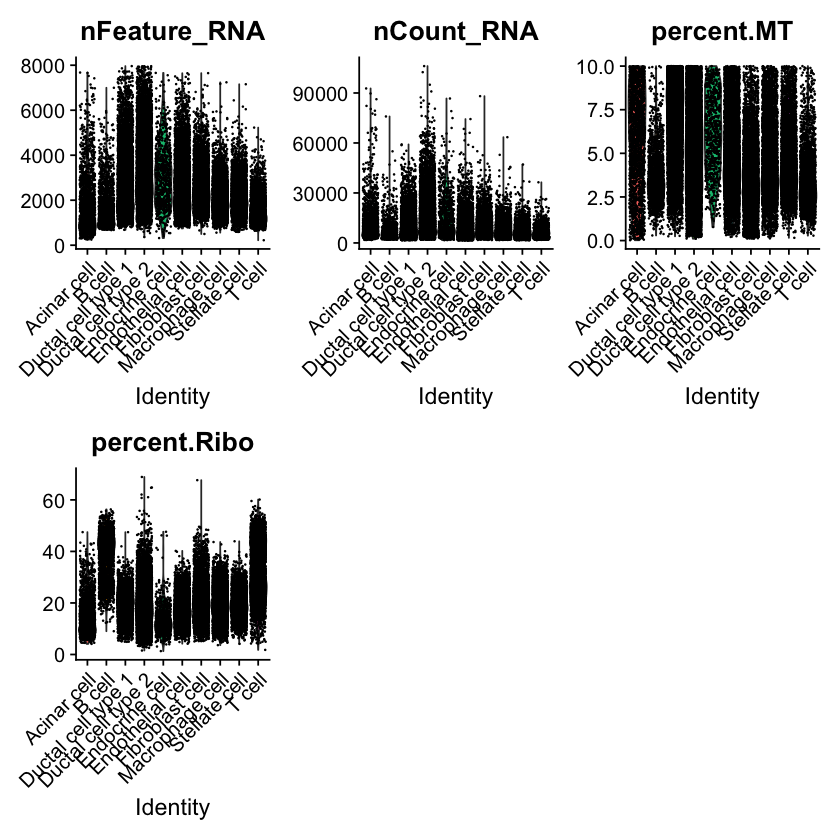

In [9]:
feats <- c("nFeature_RNA", "nCount_RNA", "percent.MT", "percent.Ribo")
VlnPlot(panc_seurat, group.by = "cluster", features = feats, pt.size = 0.05, ncol = 3) 

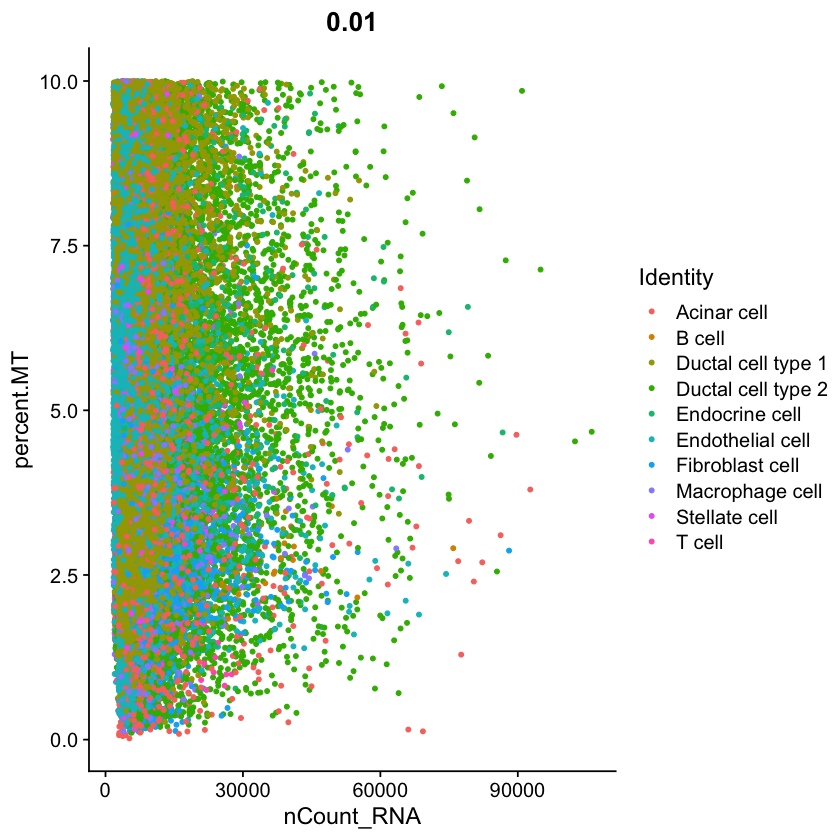

In [10]:
FeatureScatter(panc_seurat, feature1 = "nCount_RNA", feature2 = "percent.MT", group.by ="cluster")

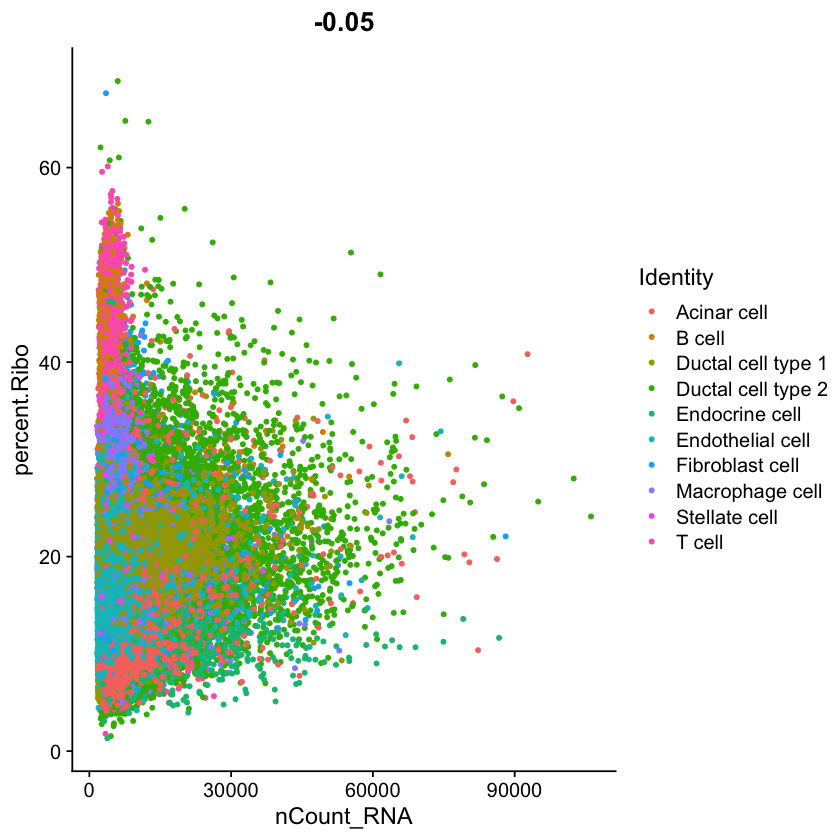

In [11]:
FeatureScatter(panc_seurat, feature1 = "nCount_RNA", feature2 = "percent.Ribo", group.by ="cluster")

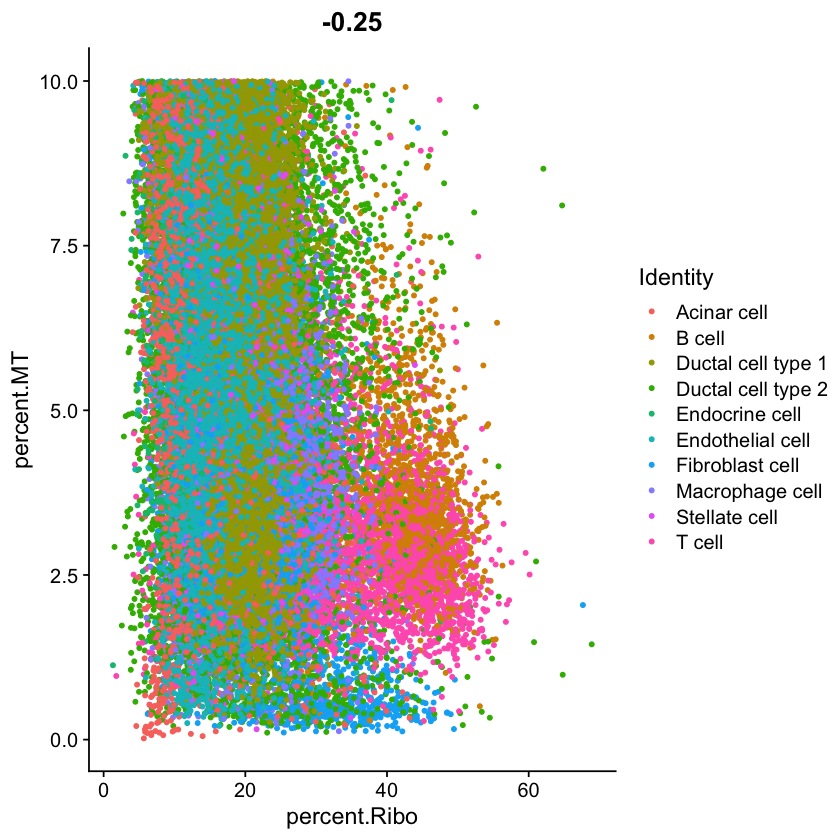

In [12]:
FeatureScatter(panc_seurat, feature1 = "percent.Ribo", feature2 = "percent.MT", group.by ="cluster")

### QC1: Remove cells with less than 5% ribosomal reads

In [14]:
selected_ribo <- WhichCells(panc_seurat, expression = percent.Ribo > 5)
panc_seurat <- subset(panc_seurat, cells = selected_ribo)
dim(panc_seurat)

[1] 23376 57406

### QC2: Remove MALAT1 gene

In [15]:
panc_seurat <- panc_seurat[!grepl("MALAT1", rownames(panc_seurat)), ]
dim(panc_seurat)

[1] 23375 57406

In [18]:
all.genes<-rownames(panc_seurat)
panc_seurat<-ScaleData(panc_seurat,features = all.genes)

Centering and scaling data matrix



In [19]:
panc_seurat <- FindVariableFeatures(object = panc_seurat)
panc_seurat <- RunPCA(panc_seurat, features = VariableFeatures(object = panc_seurat) )

PC_ 1 
Positive:  SPARCL1, IGFBP7, PDGFRB, CALD1, PLAC9, A2M, TCF4, FRZB, BGN, CD36 
	   SEPT4, SMOC2, MYL9, GIMAP4, TAGLN, CRISPLD2, SDPR, DCN, COL6A2, COL14A1 
	   GIMAP7, MYLK, TIMP3, TMEM88, LIFR, CYGB, SERPINF1, PLVAP, SYNPO2, PPP1R14A 
Negative:  SMIM22, S100A6, MUC1, TSPAN1, C19orf33, RAB25, ELF3, HN1, LGALS3, SPINT2 
	   MAL2, KRT19, CLDN7, KLF5, CYSTM1, SLC44A4, NQO1, OCIAD2, CLDN4, KRT8 
	   KCNK1, EPCAM, TMPRSS4, RAB11FIP1, CAMK2N1, MLPH, SDCBP2, LIPH, PKP3, SERINC2 
PC_ 2 
Positive:  FXYD2, CLDN10, UGT2A3, SLC4A4, SLC3A1, GMNN, CFTR, SERPINA5, RP11-528G1.2, GATM 
	   SCTR, HOMER2, DCDC2, KCNJ16, AMBP, MT1F, LINC00671, LEFTY1, DEFB1, SFRP5 
	   AKAP7, BEX1, PPP1R1B, PKHD1, SERPINA6, FAM150B, PROX1, CLU, CD37, SLC17A4 
Negative:  SPARC, SERPINH1, IGFBP7, FSTL1, COL6A2, CALD1, MMP2, BGN, TCF4, FBN1 
	   DCN, COL1A2, COL6A3, PRSS23, THY1, C1S, HTRA1, FAP, AEBP1, LUM 
	   C1R, COL5A2, CTHRC1, PCOLCE, COL1A1, NNMT, PALLD, CLEC11A, THBS2, CDH11 
PC_ 3 
Positive:  DCN, COL1A2, COL6

In [20]:
print(panc_seurat[["pca"]],dims = 1:5,nfeatures = 5)

PC_ 1 
Positive:  SPARCL1, IGFBP7, PDGFRB, CALD1, PLAC9 
Negative:  SMIM22, S100A6, MUC1, TSPAN1, C19orf33 
PC_ 2 
Positive:  FXYD2, CLDN10, UGT2A3, SLC4A4, SLC3A1 
Negative:  SPARC, SERPINH1, IGFBP7, FSTL1, COL6A2 
PC_ 3 
Positive:  DCN, COL1A2, COL6A3, LUM, C1S 
Negative:  PLVAP, RAMP2, EMCN, CLEC14A, AC011526.1 
PC_ 4 
Positive:  FXYD2, SLC4A4, CLU, CLDN10, CFTR 
Negative:  LAPTM5, HLA-DRA, TYROBP, AIF1, FCER1G 
PC_ 5 
Positive:  FXYD2, SLC4A4, CFTR, SCTR, CLU 
Negative:  VSIG2, CAPN8, C19orf33, TSPAN1, MUC1 


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:20:23 UMAP embedding parameters a = 0.9922 b = 1.112

00:20:23 Read 57406 rows and found 10 numeric columns

00:20:23 Using Annoy for neighbor search, n_neighbors = 30

00:20:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:20:30 Writing NN index file to temp file /var/folders/2n/g2ykn4sj6ysdb19km52cdkf40000gn/T//RtmpYvzcuq/file100201a863f81

00:20:30 Searching Annoy index using 1 thread, search_k = 3000

00:20:52 Annoy recall = 100%

00:20:53 Commencing smooth kNN distance calibr

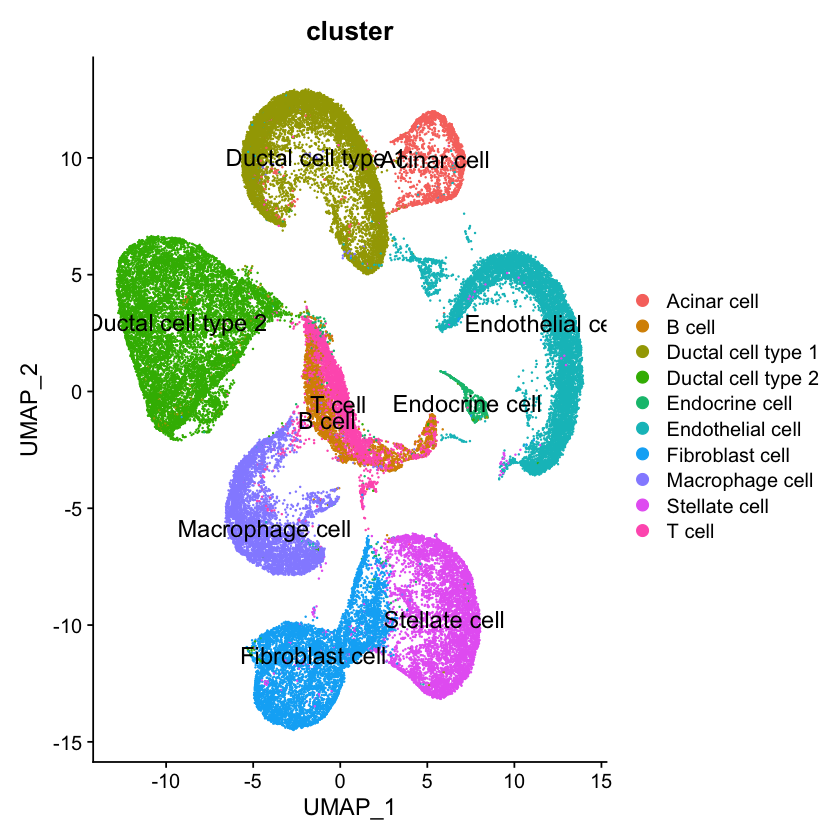

In [21]:
panc_seurat<-RunUMAP(panc_seurat, dims = 1:10)

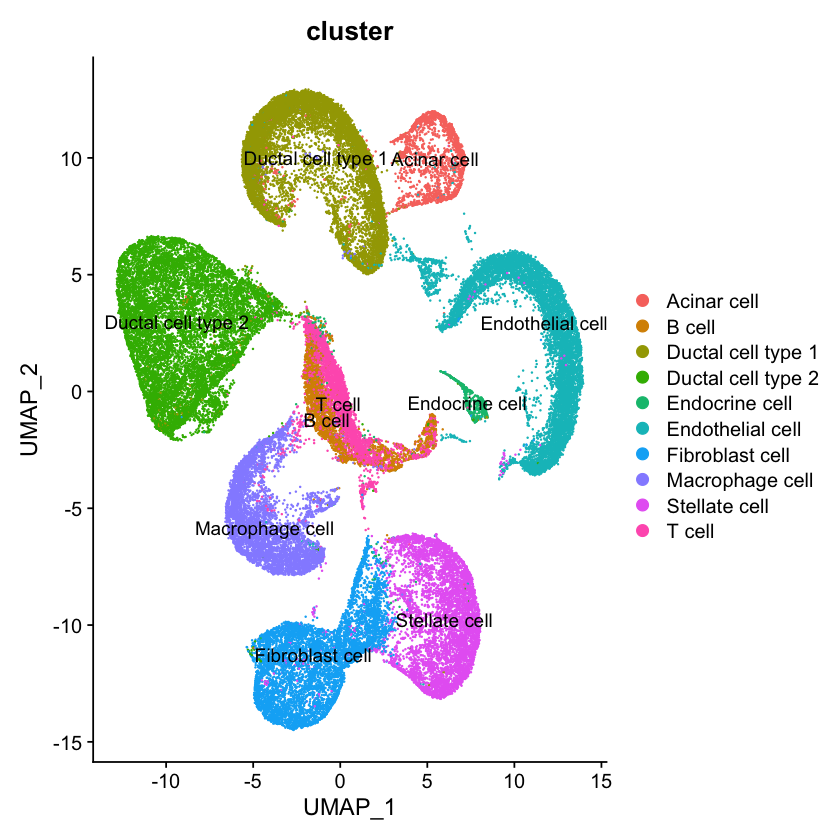

In [23]:
DimPlot(panc_seurat,reduction = "umap", group.by = "cluster", label = TRUE)